<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/Multipasos3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
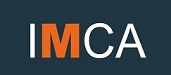

# Metodo Adams Bashforth de 3 pasos (AM3)
Sea el problema de valor inicial(PVI):

$$   \dot{y}=f(t,y) $$
con
$y(a)=\alpha$  y  $a<t<b$


Donde $f$ una funcion Lipschitziana en la variable $y$.

El método consiste primero hallar las aproximaciones $w_{1}$, $w_{2}$ con el metodo de Runke Kutta. Asi se tiene la primera parte de la iteracion:

$$w_{i}=w_{i-1}+\frac{1}{6}(K_{1}+2K_{2}+2K_{3}+K_{4}) $$

Para $i=1,2$

Donde:
* $K_{1}=hf(t_{i-1},w_{i-1})$
* $K_{2}=hf(t_{i-1}+ \frac{1}{2}h,w_{i-1}+\frac{1}{2}K_{1})$
* $K_{3}=hf(t_{i-1}+\frac{1}{2}h,w_{i-1}+\frac{1}{2}K_{2})$
* $K_{4}=hf(t_{i-1}+h,w_{i-1}+K_{3})$

La segunda parte consiste en hallar los siguientes puntos para $i=2,...,N$, con los puntos $w_{0}$, $w_{1}$, $w_{2}$ calculados anteriormente, asi se tiene la siguiente iteracion:

$w_{i+1}=w_{i}+h(9f(t_{i+1},w_{i+1})+19f(t_{i},w_{i})-5f(t_{i-1},w_{i-1})+f(t_{i-2},w_{i-2}))/24$




In [14]:
#MULTIPASOS: ADAMS-BASHFORTH DE 3 PASOS (AB3)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Runge Kutta para el arranque de 2 pasos w1 y w2
#esta funcion se usara internamente en AM3
def RK4(a,b,y0,f,N):
  h=(b-a)/N
  t=a
  w=y0
  Y,T,=[],[]
  T+=[a]
  Y+=[w]
  #solo calcula para i=1,2
  for i in range(1,3):
    #calculo de coeficiente para RK4
    k1=h*f(t,w)
    k2=h*f(t+h/2,w+k1/2)
    k3=h*f(t+h/2,w+k2/2)
    k4=h*f(t+h,w+k3)
    #calculo de la aproximacion
    w=w+(k1+2*k2+2*k3+k4)/6
    Y+=[w]
    t=a+i*h
    T+=[t]
  return T,Y

#Programa principal AM3
def AB3(a,b,y0,f,N):
  """
  Implementacion metodo de ADAMS BASHFORTH DE 3 PASOS
  a--Inicio Intervalo
  b--Fin de Intervalo
  y0--Aproximacion Inicial
  w0=y0--Primera aproximacion
  f--funcion
  N--Pasos
  Salida
  w--aproximacion final
  """
  #paso 1: iniciacion de los datos principales
  h=(b-a)/N
  t=a
  w=y0
  Y,T,=[],[]
  #paso 2: Calculo de w0,w1,w2 con RK4
  T,Y=RK4(a,b,w,f,N)
  w0,w1,w2,t0,t1,t2=Y[0],Y[1],Y[2],T[0],T[1],T[2]
  #paso 3: Con los tres pasos w0,w1,w2, se inicia el calculo
  #de los paso siguientes Wn
  for i in range(3,N+1):
    #paso 4: calculo de w con los pasos w0,w1,w2
    t=a+i*h
    w=w2+h*(23*f(t2,w2)-16*f(t1,w1)+5*f(t0,w0))/12
    Y+=[w]
    T+=[t]
    #paso 5: actualizando valores para la siguiente iteracion
    #w0=w1,w1=w2,w2=w,t0=t1,t1=t2,t2=t
    w0,w1,w2,t0,t1,t2=w1,w2,w,t1,t2,t
  return T,Y

In [15]:
#definicion de la funcion f
def f(t,y):
  return 1+(t-y)**2

In [16]:
# Definicion de la funcion solucion Y
def ff(T):
  y_real=[]
  for t in T:
    y_real+=[t+(1/(1-t))]
  return y_real

      t       w_i       y_i
0   2.0  1.000000  1.000000
1   2.1  1.190909  1.190909
2   2.2  1.366666  1.366667
3   2.3  1.531242  1.530769
4   2.4  1.686357  1.685714
5   2.5  1.834107  1.833333
6   2.6  1.975815  1.975000
7   2.7  2.112588  2.111765
8   2.8  2.245251  2.244444
9   2.9  2.374462  2.373684
10  3.0  2.500743  2.500000


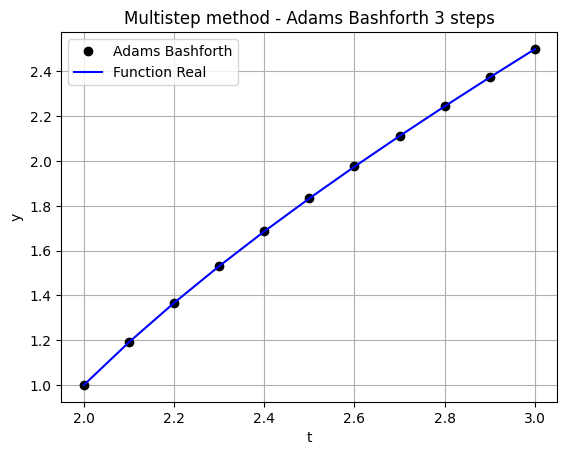

In [18]:
#aplicando el metodo Adams Bashforth 3 steps
tr,yr=AB3(2,3,1,f,10)
#calculo de la solucion real
yv=ff(tr)
#conversion de la listas a un dataframe
datos={'t':tr,'w_i':yr,'y_i':yv}
df=pd.DataFrame(datos)
print(df)

#ploteo de los resultados
plt.plot(tr,yr,'ok')
plt.plot(tr,yv,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Multistep method - Adams Bashforth 3 steps')
plt.legend(['Adams Bashforth','Function Real'])
plt.show()